In [1]:
import pandas as pd
import random
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_predict
import numpy as np

In [2]:
df=pd.read_csv('car_data.csv')

df.head()

,Make,Model,Year,Engine_Size_Liters,Fuel_Efficiency_MPG,Mileage,Horsepower,Transmission,Fuel_Type,Color,...,Features,Safety_Rating,Warranty_Years,Market_Price,Dealer_Name,Location,Seller_Type,Rating,Car_Size,Screen_Resolution
0,Ford,Corolla,2012,2.50,34,45853,293,Automatic,Diesel,Red,...,"['Leather Seats', 'Navigation']",2.6,4,25011,Best Cars Inc.,Los Angeles,Dealership,5.0,163x67 inches,3435x1431
1,Ford,Camry,2012,3.40,40,95449,466,Manual,Gasoline,Blue,...,"['Navigation', 'Backup Camera']",3.7,0,16084,ABC Auto,New York,Private Seller,5.0,183x80 inches,2112x1663
2,Ford,Corolla,2011,1.37,40,50194,448,Automatic,Diesel,Blue,...,"['Bluetooth', 'Navigation']",2.6,2,66054,Best Cars Inc.,Los Angeles,Private Seller,4.4,164x67 inches,2794x1684
3,Honda,F-150,2011,2.33,26,17308,362,Automatic,Hybrid,Black,...,"['Navigation', 'Backup Camera']",4.3,0,43659,Best Cars Inc.,New York,Private Seller,4.6,200x66 inches,2041x2054
4,Ford,Civic,2008,3.31,33,20775,139,Manual,Hybrid,Blue,...,"['Bluetooth', 'Navigation']",3.6,0,48428,XYZ Motors,Miami,Dealership,4.1,164x79 inches,3387x1698


In [3]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine_Size_Liters', 'Fuel_Efficiency_MPG',
       'Mileage', 'Horsepower', 'Transmission', 'Fuel_Type', 'Color',
       'Price_USD', 'Condition', 'Drivetrain', 'Num_Owners', 'Features',
       'Safety_Rating', 'Warranty_Years', 'Market_Price', 'Dealer_Name',
       'Location', 'Seller_Type', 'Rating', 'Car_Size', 'Screen_Resolution'],
      dtype='object')

In [4]:
numeric_cols = df.select_dtypes(include=[float, int])
correlation_matrix = numeric_cols.corr()

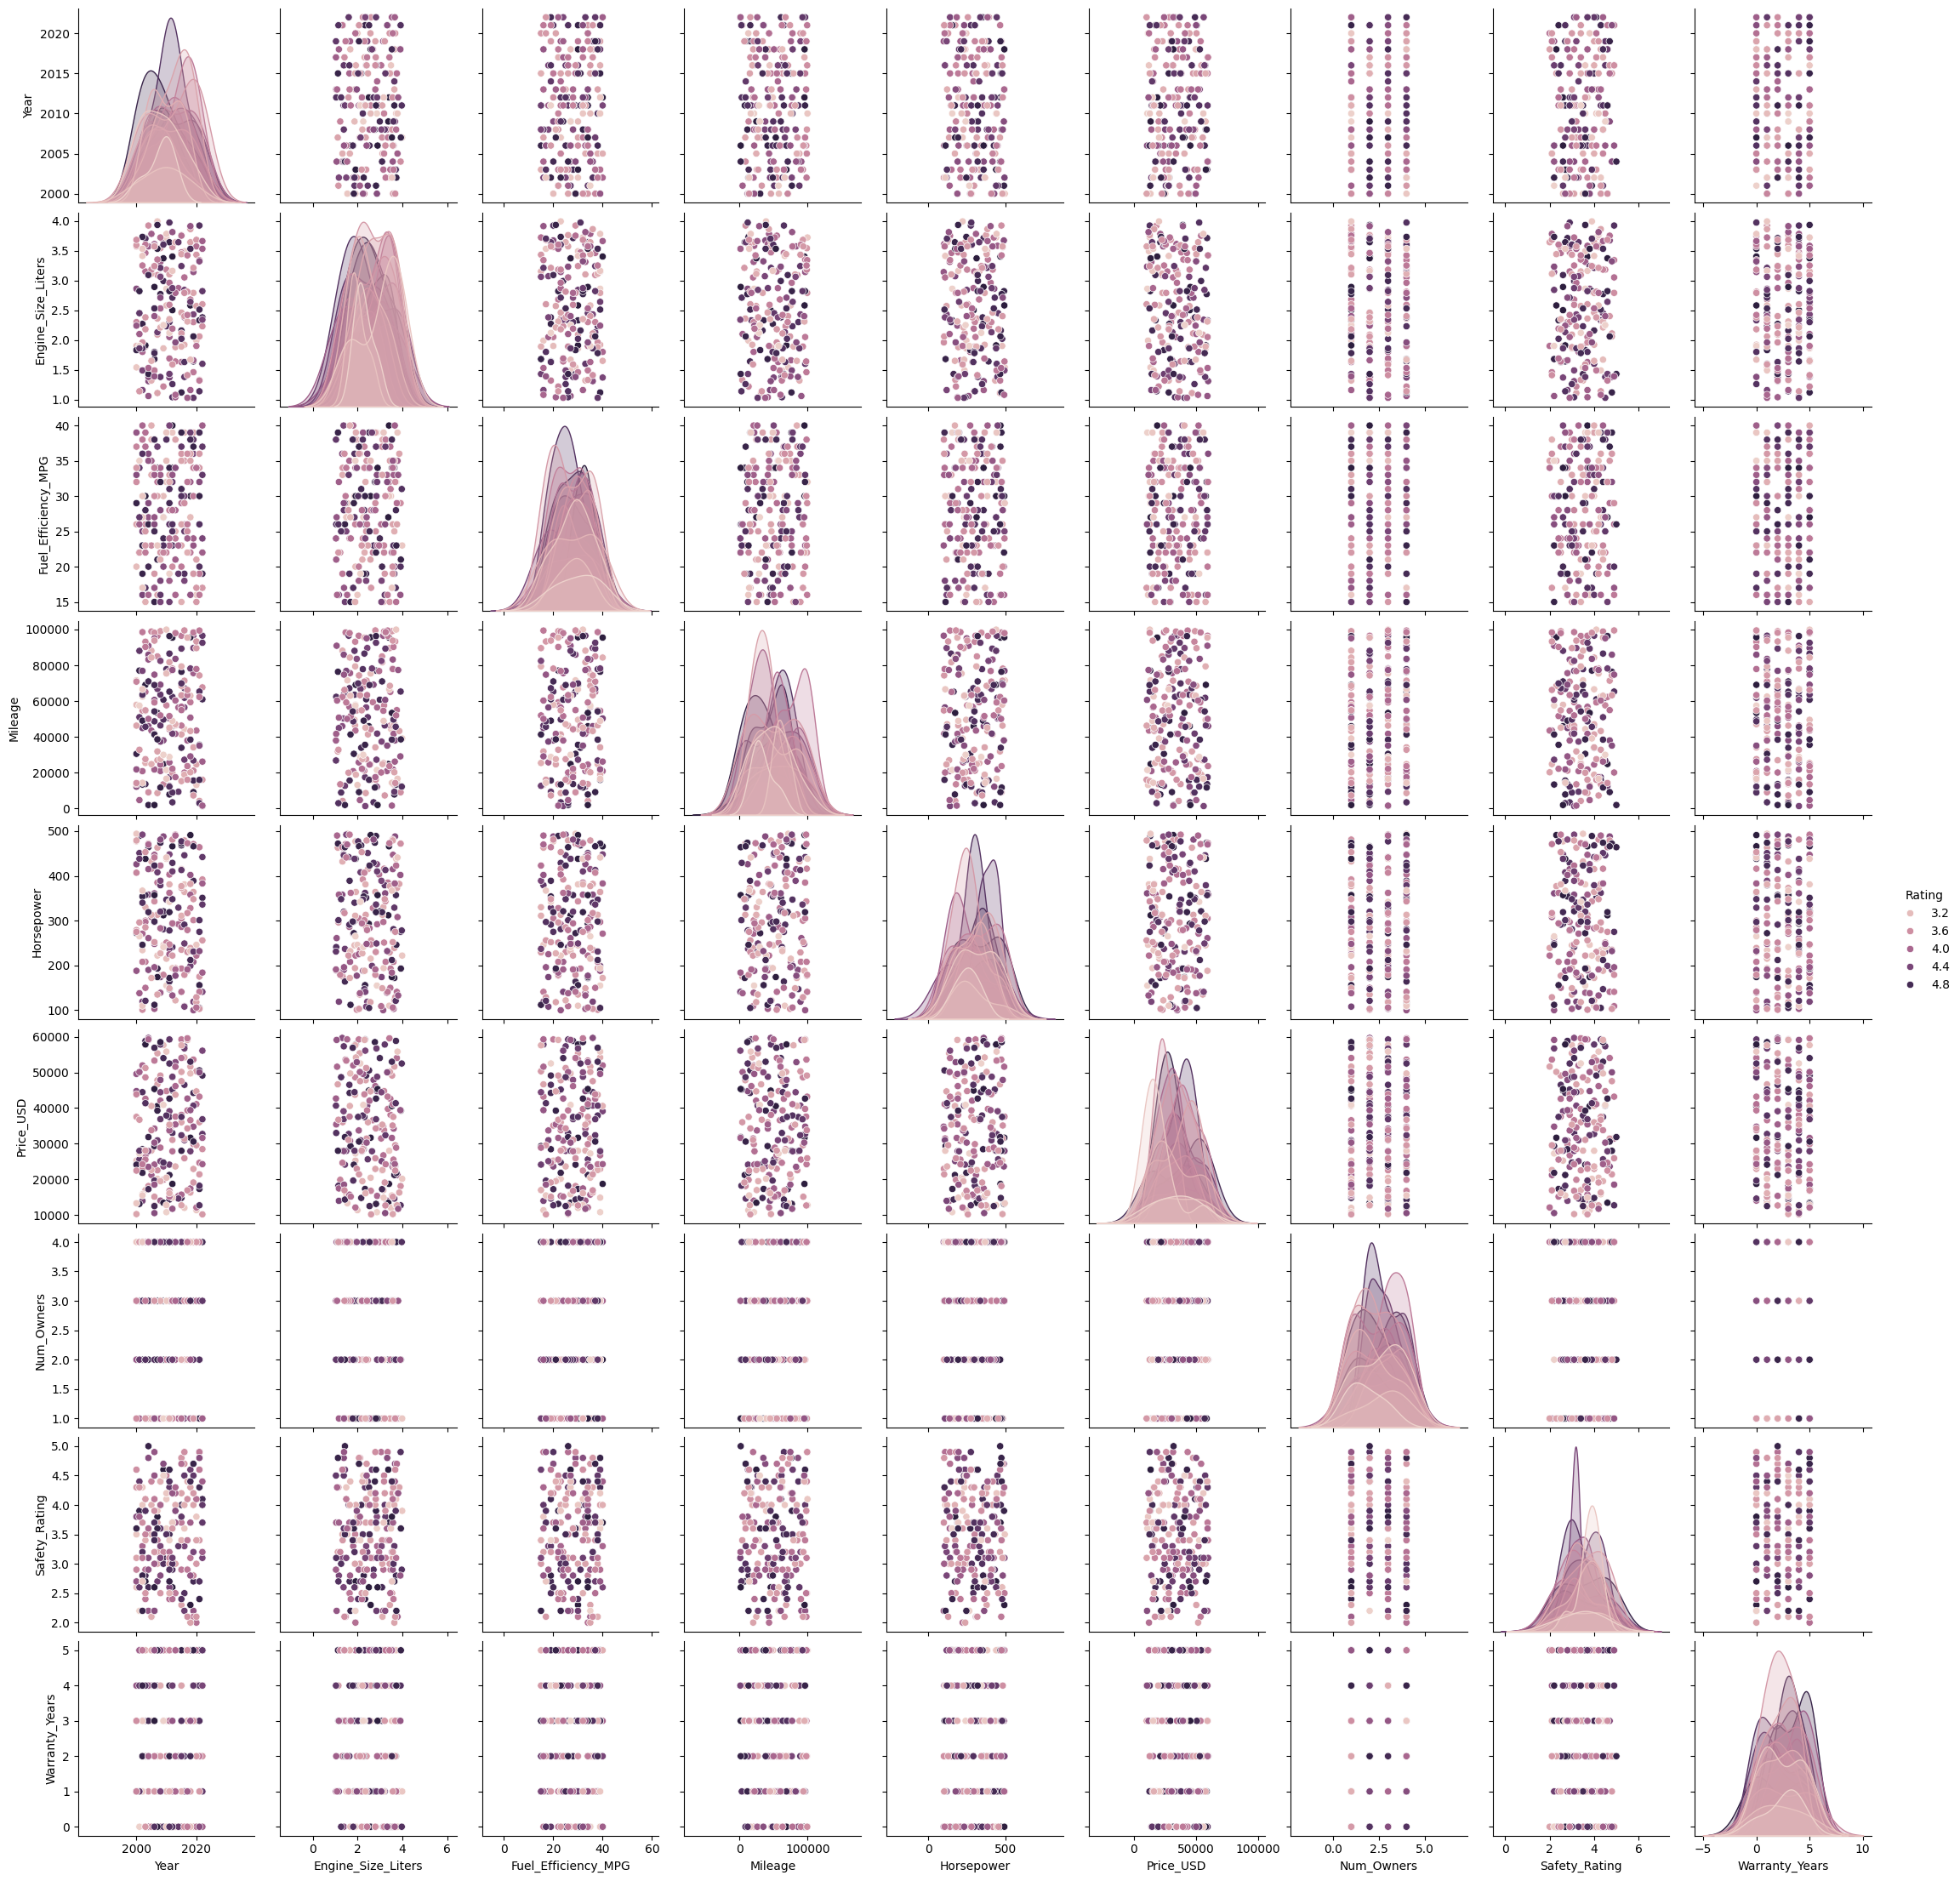

<Figure size 600x400 with 0 Axes>

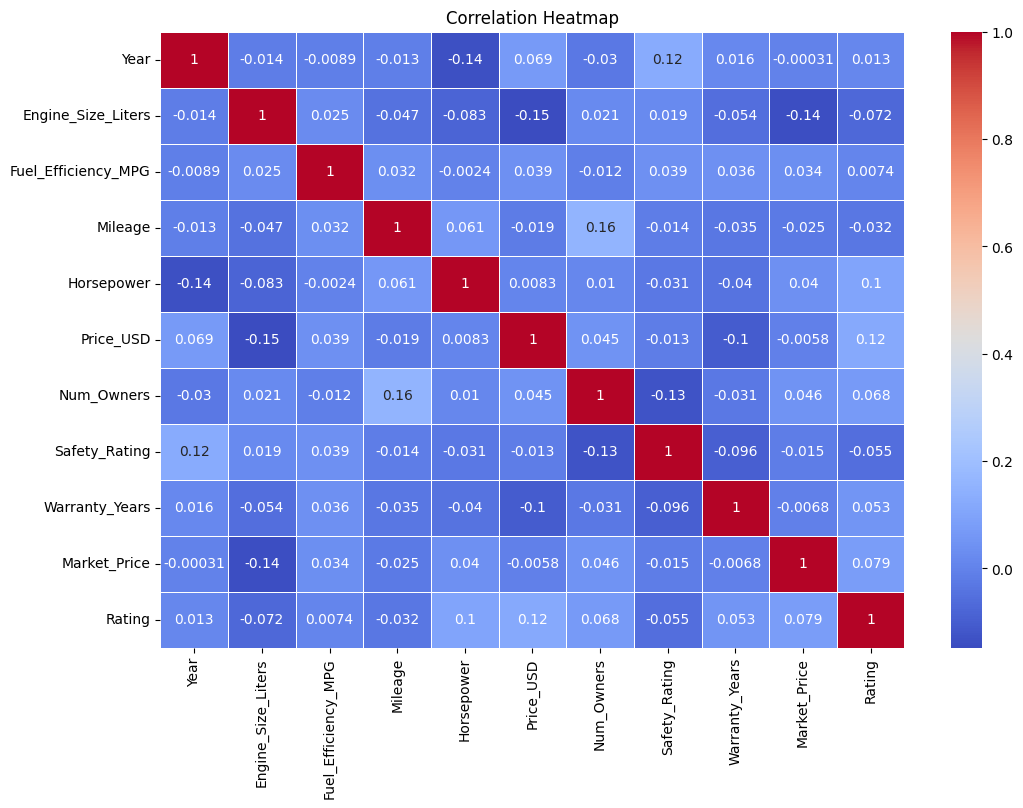

In [5]:
# Let's explore the dataset by visualizing the distributions and relationships between variables
sns.pairplot(df.drop('Market_Price', axis=1), hue='Rating')
plt.figure(figsize=(6,4))
plt.show()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [6]:
X = df.drop(['Market_Price'], axis=1)

In [7]:
X = pd.get_dummies(X)

In [8]:
y = df['Market_Price']

In [9]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [10]:
model.fit(X, y)

RandomForestRegressor(random_state=42)

In [11]:
feature_importances = model.feature_importances_

In [12]:
feature_names = X.columns

In [13]:
sorted_idx = feature_importances.argsort()[::-1]

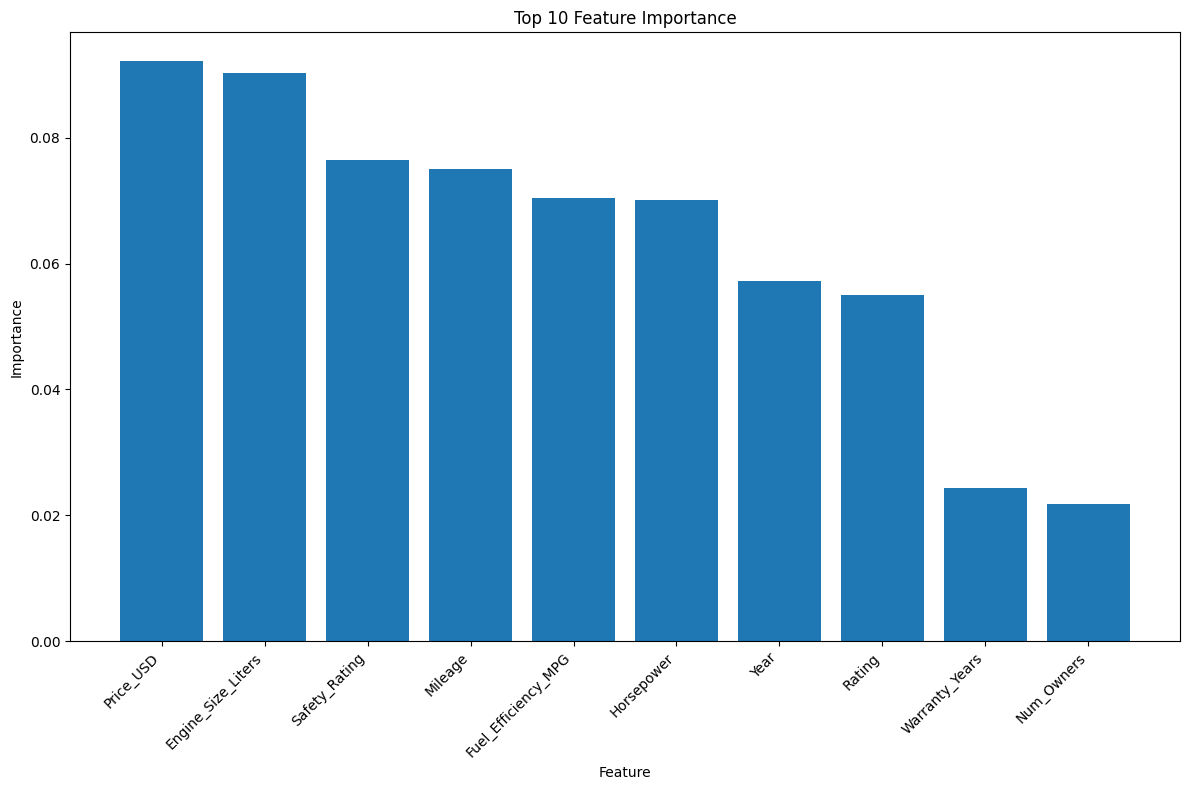

In [14]:
N = 10  # Number of top features to display

plt.figure(figsize=(12, 8))
plt.bar(range(N), feature_importances[sorted_idx][:N])
plt.xticks(range(N), [feature_names[i] for i in sorted_idx][:N], rotation=45, ha="right")
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top {} Feature Importance'.format(N))
plt.tight_layout()
plt.show()



In [15]:
rmse_scores = -cross_val_score(model, X, y, cv=5, scoring="neg_root_mean_squared_error")

In [16]:
mean_rmse = np.mean(rmse_scores)

In [17]:
print("Mean Cross-Validation RMSE:", mean_rmse)

Mean Cross-Validation RMSE: 17733.446584697118


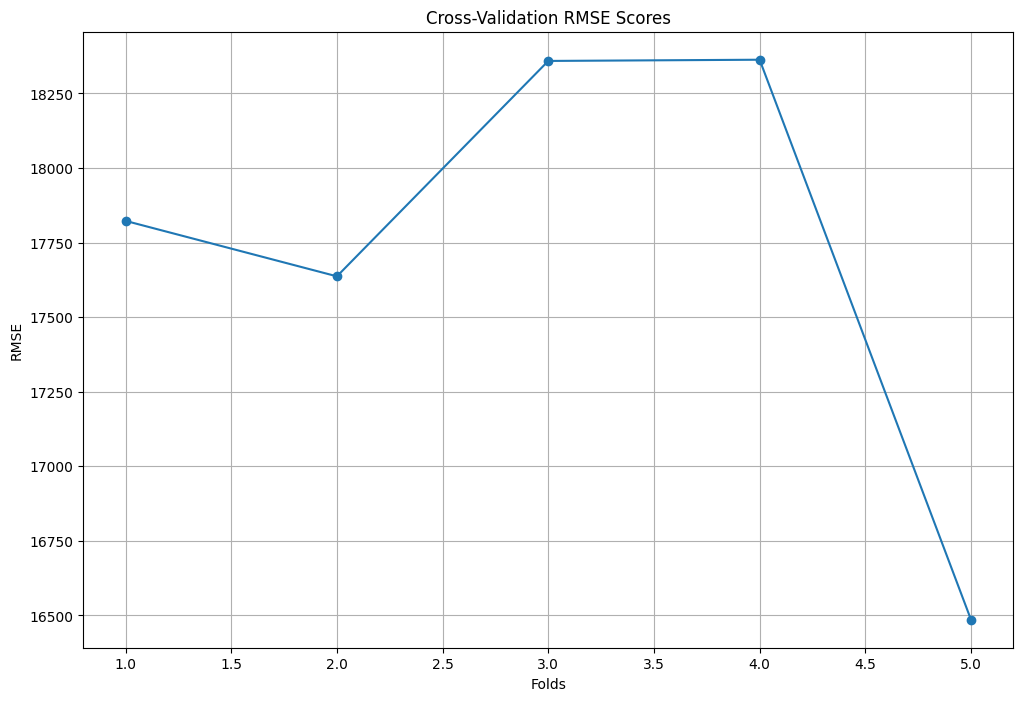

In [18]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, len(rmse_scores) + 1), rmse_scores, marker='o', linestyle='-')
plt.xlabel('Folds')
plt.ylabel('RMSE')
plt.title('Cross-Validation RMSE Scores')
plt.grid(True)
plt.show()

In [19]:
mae_scores = cross_val_predict(model, X, y, cv=5)
mean_mae = mean_absolute_error(y, mae_scores)

In [20]:

print("Mean Absolute Error (MAE):", mean_mae)

Mean Absolute Error (MAE): 15314.982


In [21]:
estimators_range = range(1, 101)

In [22]:
mse_values = []

for n_estimators in estimators_range:
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    mse_scores = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mean_mse = mse_scores.mean()
    mse_values.append(mean_mse)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
estimators_range = range(1, 101)

In [25]:
train_mse_values = []
test_mse_values = []

In [26]:
for n_estimators in estimators_range:
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)

    train_predictions = model.predict(X_train)
    train_mse = mean_squared_error(y_train, train_predictions)
    train_mse_values.append(train_mse)

    test_predictions = model.predict(X_test)
    test_mse = mean_squared_error(y_test, test_predictions)
    test_mse_values.append(test_mse)

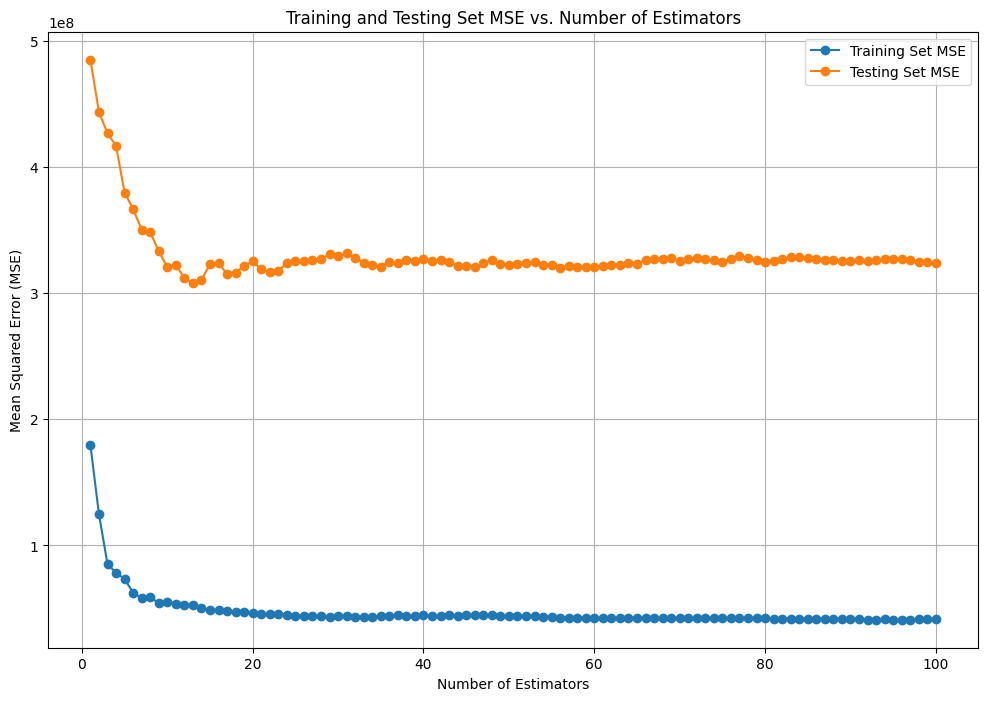

In [27]:
plt.figure(figsize=(12, 8))
plt.plot(estimators_range, train_mse_values, marker='o', label='Training Set MSE')
plt.plot(estimators_range, test_mse_values, marker='o', label='Testing Set MSE')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Testing Set MSE vs. Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()

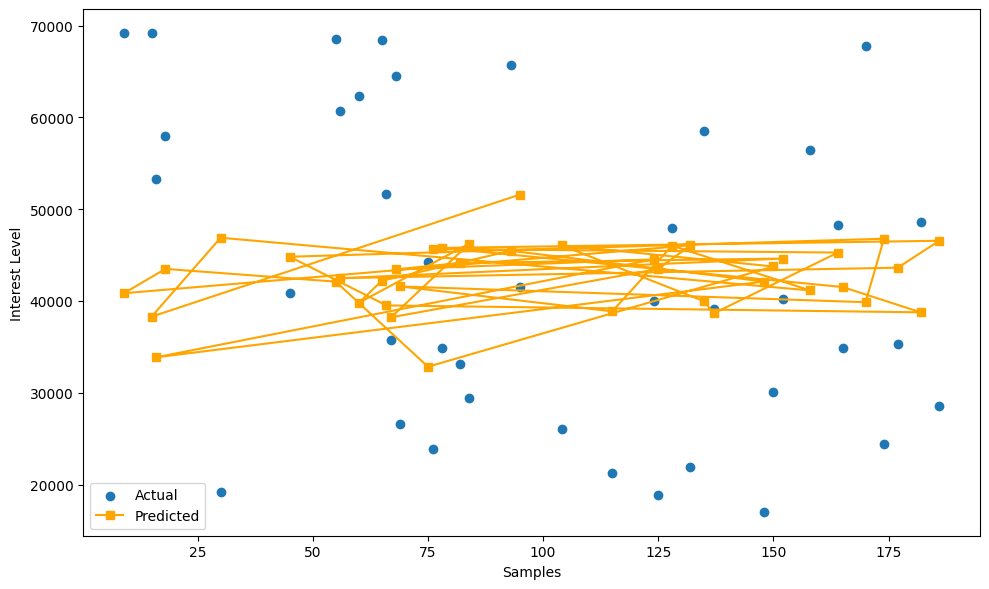

In [28]:
y_pred = model.predict(X_test)
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
plt.figure(figsize=(10, 6))
plt.scatter(result.index, result['Actual'], label='Actual', marker='o')
plt.plot(result.index, result['Predicted'], label='Predicted', linestyle='-', marker='s', color='orange')
plt.xlabel("Samples")
plt.ylabel("Interest Level")
plt.legend()
plt.tight_layout()
plt.show()